#**Synapse Week Two**

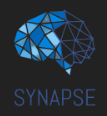

Last week, we dealt with the visualization and analytical aspect of ML. This week, lets directly get our hands dirty with various ML models.

Possibly the first question one must ask is, what is Machine Learning essentially made up of? In a broad sense, ML problems can be split into Supervised and Unsupervised learning. In supervised learning are the categories of Classification and Regression, which is what we'll explore today.

Like last time, resources and comments are provided above each cell, so peruse the resources and then get coding. Enough chitchat, lets get to work

Supervised vs Unsupervised vs Reinforcement Learning:

https://www.simplilearn.com/tutorials/machine-learning-tutorial/types-of-machine-learning

Regression vs Classification :

https://www.analyticsvidhya.com/blog/2023/05/regression-vs-classification/ (Might be a little wordy)

https://www.youtube.com/watch?v=1NBwM5tavTk&ab_channel=IntuitiveML
(A very quick video)

https://www.geeksforgeeks.org/ml-classification-vs-regression/
(Short and Sweet)

Machine Learning for Everyone (Read till 1.1):

https://vas3k.com/blog/machine_learning/

Overfitting and Underfitting [VERY IMPORTANT]
https://www.youtube.com/watch?v=T9NtOa-IITo

Lets import all the basic libraries.

In [ ]:
# !pip install shap -q  #Will be used later on

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Regression

For regression we will use the car sales dataset - https://drive.google.com/file/d/1dtwer8INIz05mULkV5yk8-Fzk2r3K1Of/view?usp=sharing

#### Basic EDA

Import dataset

In [205]:
df= pd.read_csv('/content/Car_details.csv')

##### Do .head, .info and .describe in the subsequent cells

In [206]:
print(df.head())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

In [207]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None


In [208]:
print(df.describe())

              year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000


##### Plot a bar chart for the year, fuel and transmission columns

<Axes: ylabel='count'>

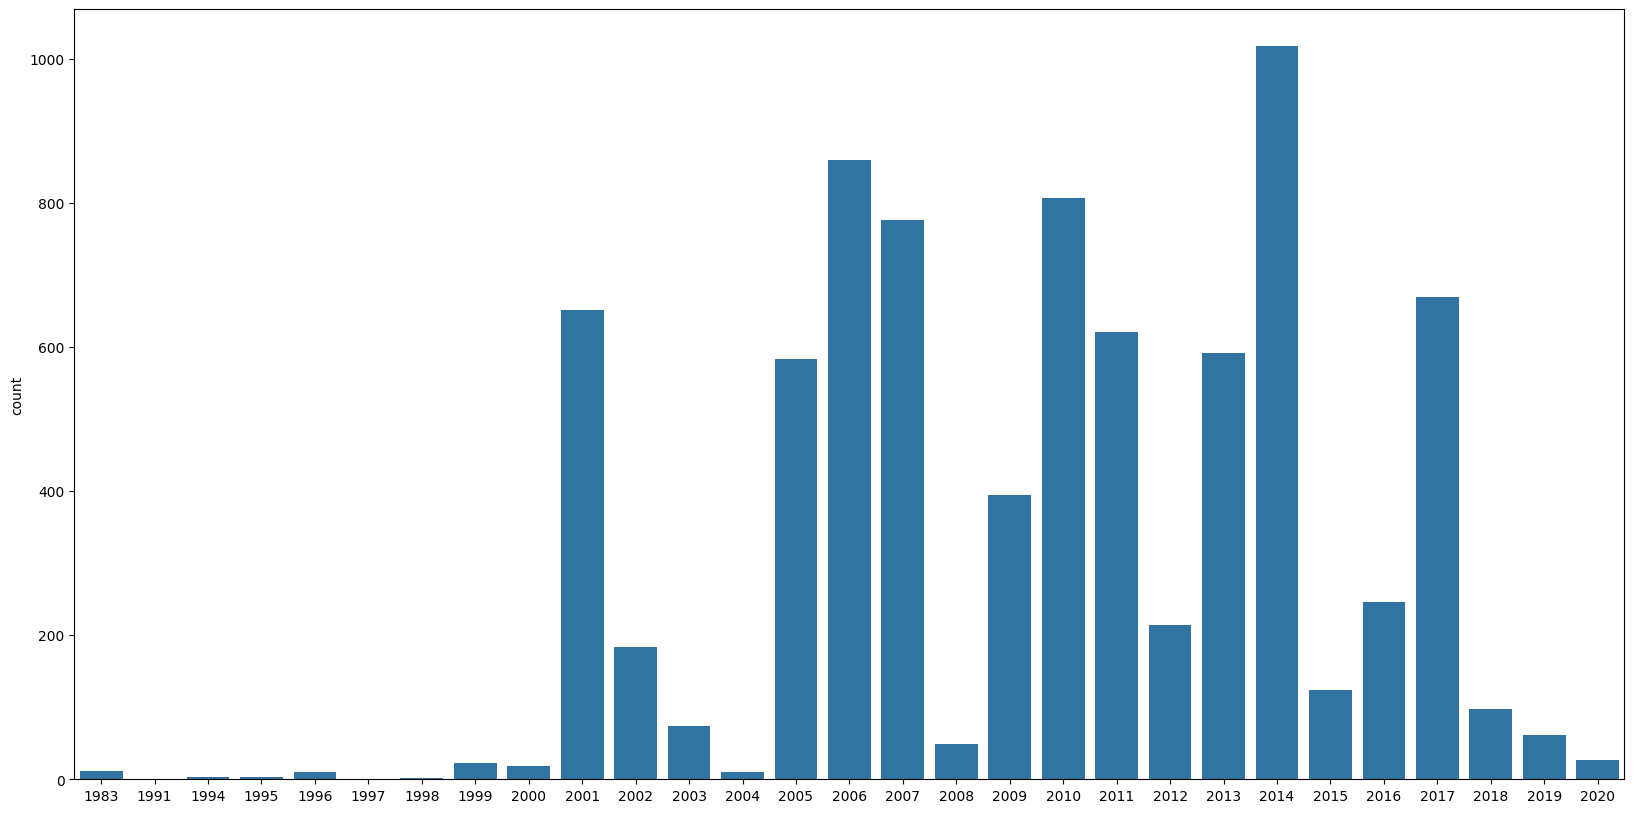

In [209]:
plt.figure(figsize=(20, 10))
sns.barplot(x=df['year'].unique(), y=df['year'].value_counts())

<Axes: ylabel='count'>

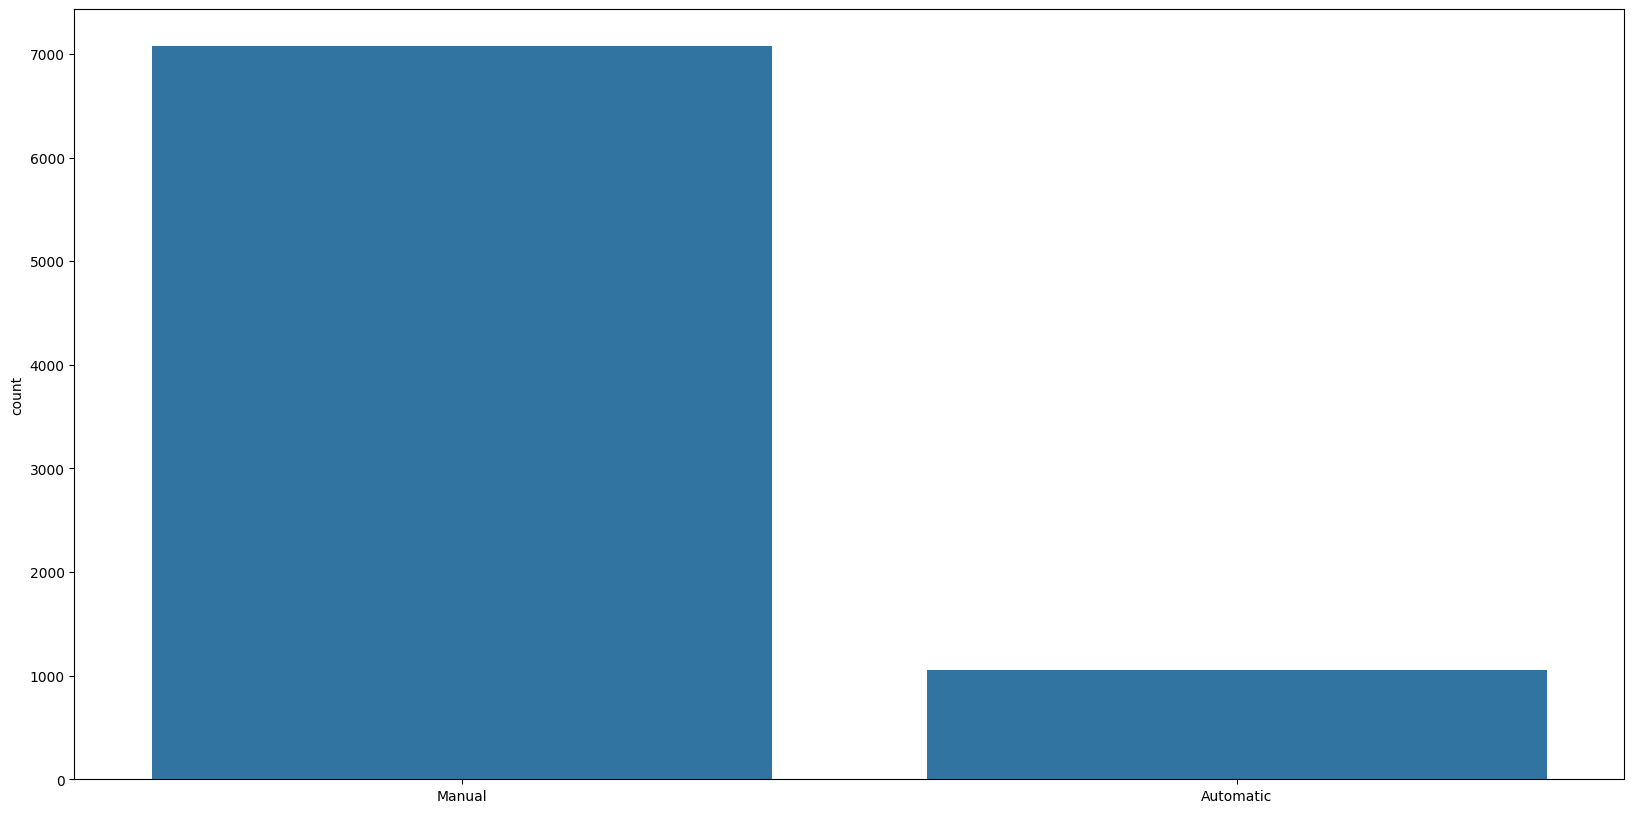

In [210]:
plt.figure(figsize=(20, 10))
sns.barplot(x=df['transmission'].unique(), y=df['transmission'].value_counts())

<Axes: ylabel='count'>

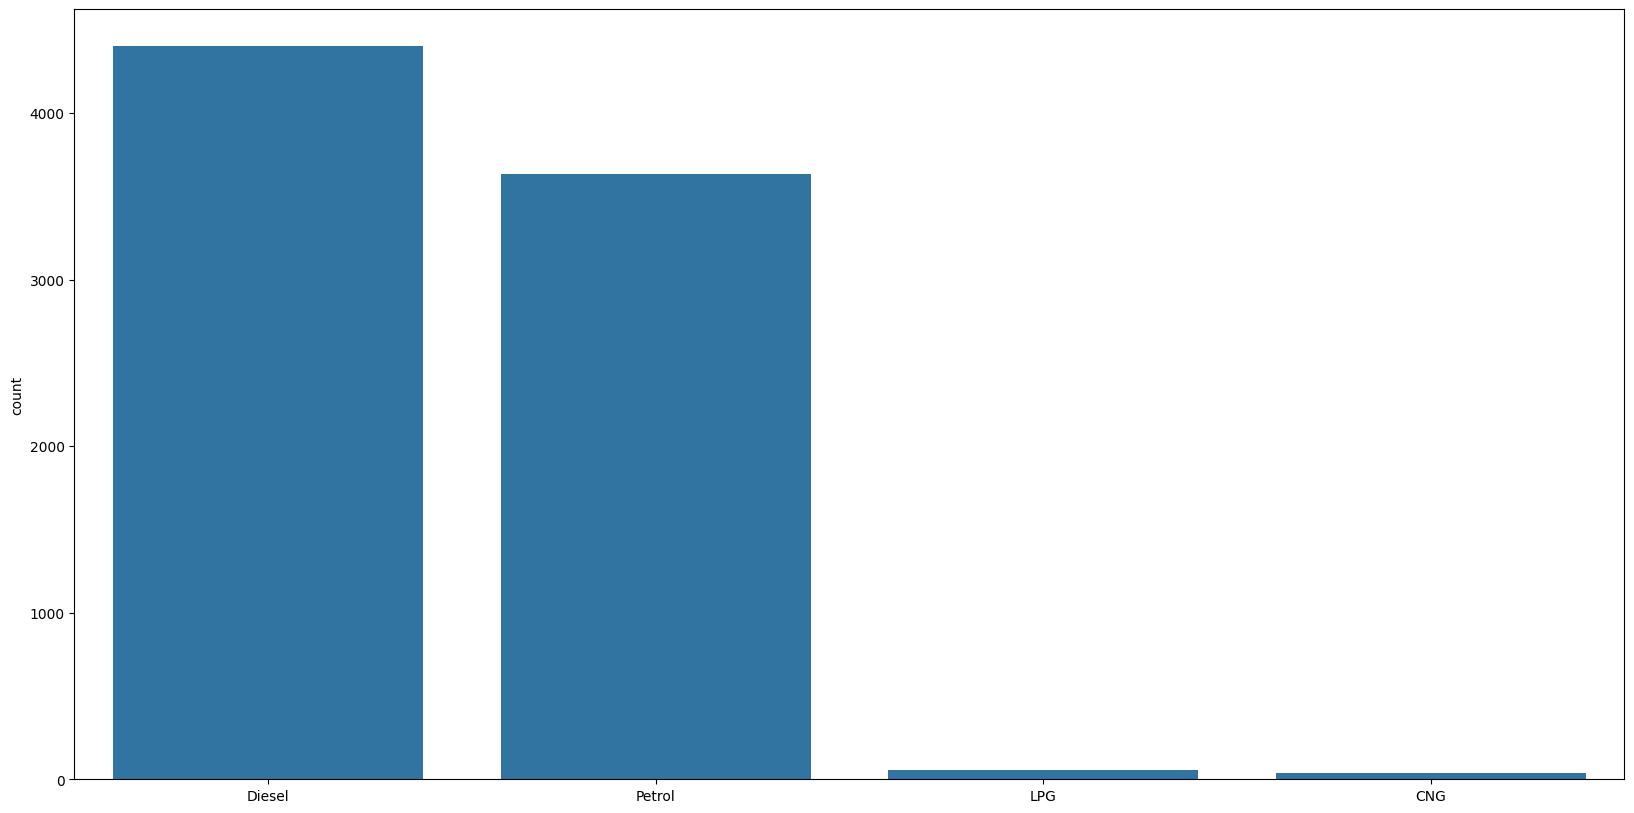

In [211]:
plt.figure(figsize=(20, 10))
sns.barplot(x=df['fuel'].unique(), y=df['fuel'].value_counts())

##### Plot a pie chart for the owner and seats column

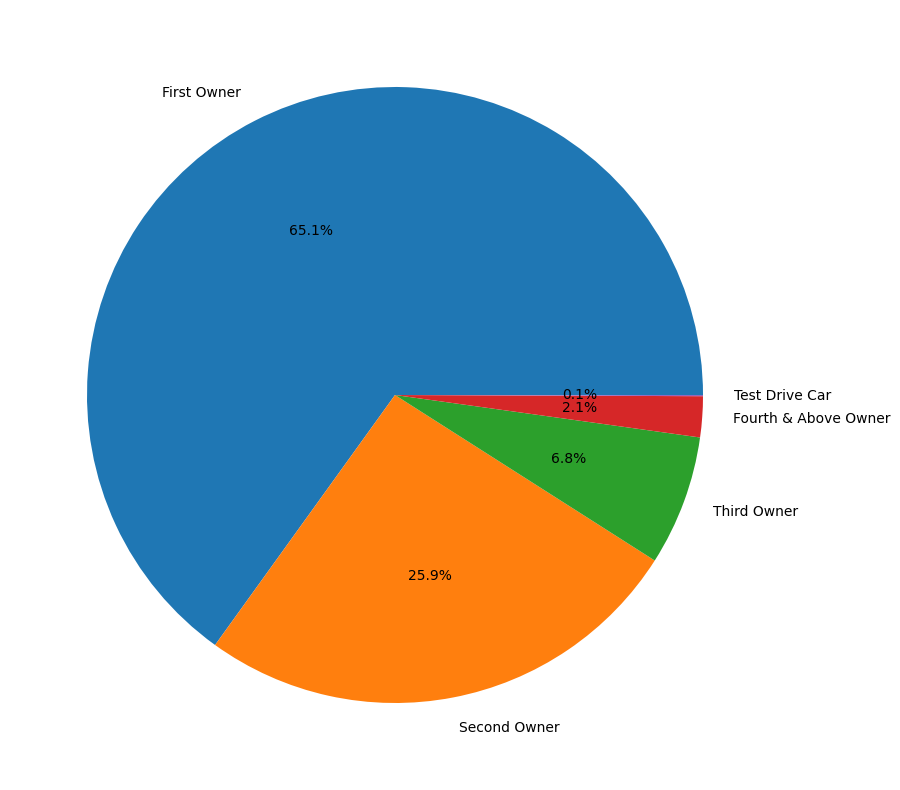

In [212]:
owners=df['owner'].unique()
plt.figure(figsize=(10, 10))
plt.pie(df['owner'].value_counts(), labels=owners, autopct='%1.1f%%')
plt.show()

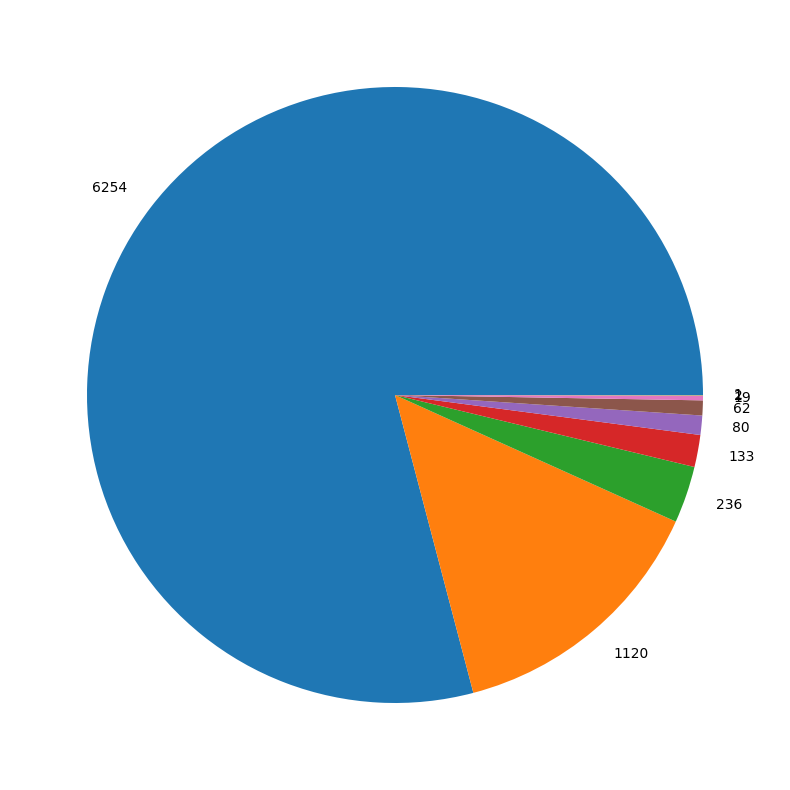

In [213]:
seats=df['seats'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(seats, labels=seats)
plt.show()

##### Make a KDE plot to represent the engine column

##### Since the engine column is of type object you'll need to convert it to float and round it to the nearest 10 place as it would be easier to count and plot


<Axes: xlabel='engine', ylabel='Density'>

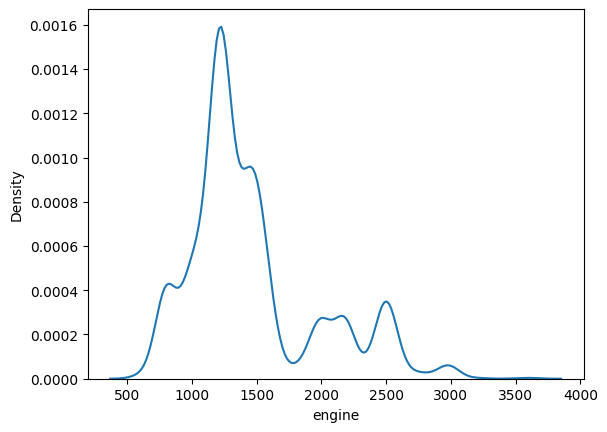

In [214]:
# code here
# code ends
df['engine'] = df['engine'].str.replace(' CC', '').astype(float).round(-1)
sns.kdeplot(df['engine'])

Plot the graph

##### Also make a countplot for the Engine column
hint: sns.countplot

<Axes: xlabel='engine', ylabel='count'>

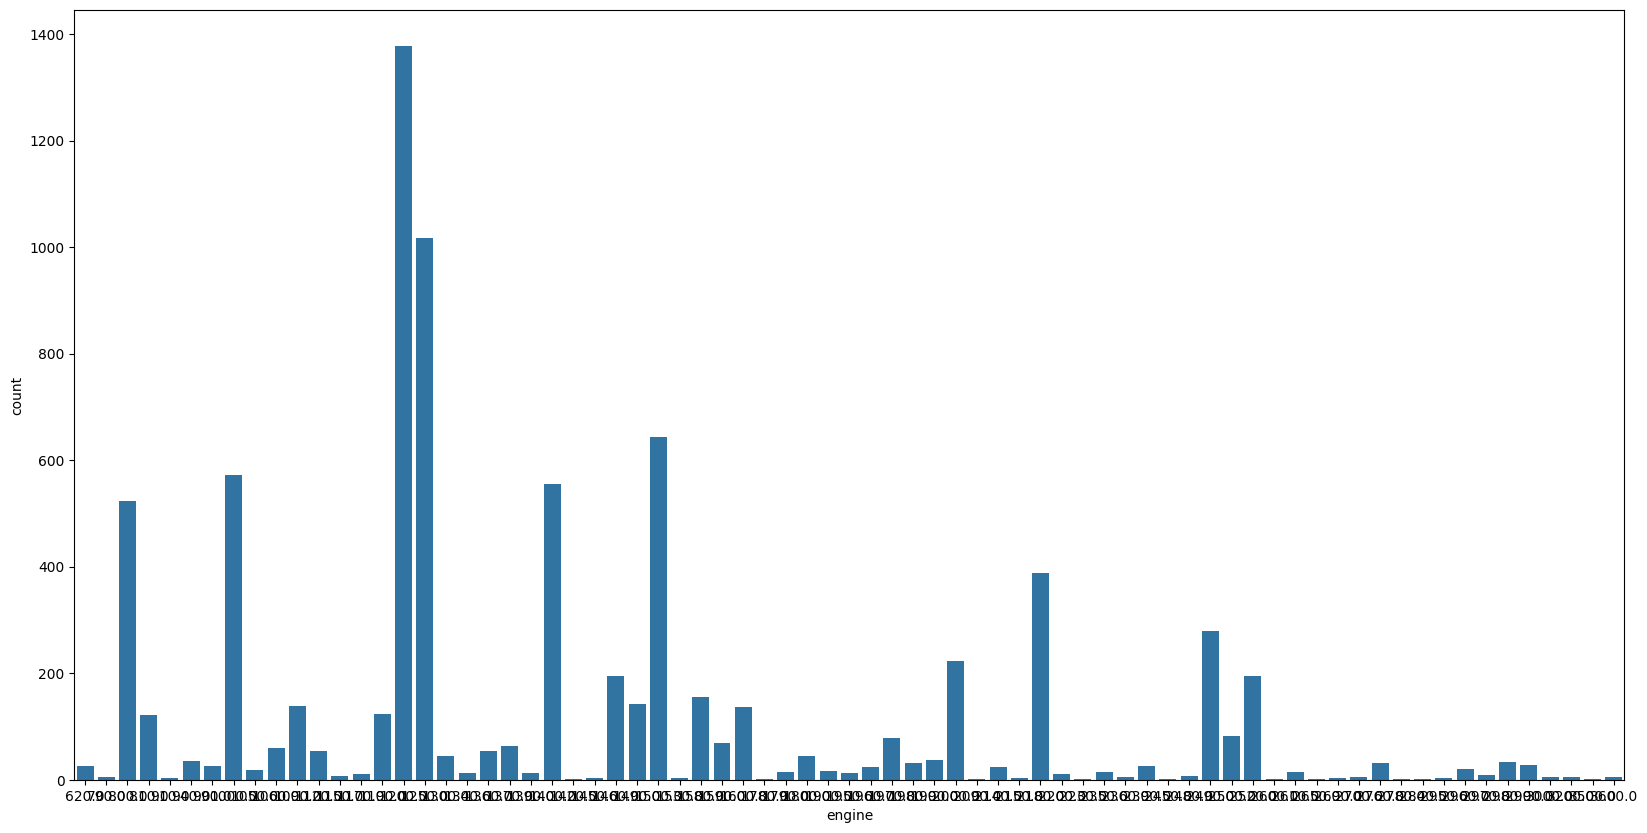

In [215]:
#plot here
plt.figure(figsize=(20, 10))
sns.countplot(df, x="engine", gap=2)

##### As you can see in the Name column the entire name of the car is given, it will be very difficut to perfrom EDA and feed in this column into our Regression model so we will just extract the car manufacturer's name and create a new column Brand

In [216]:
# code here
# code ends
df['brand']=df['name'].str.split(' ').str[0]
print(df['brand'])

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: brand, Length: 8128, dtype: object


##### Plot a bar graph for the new column brand

<Axes: ylabel='count'>

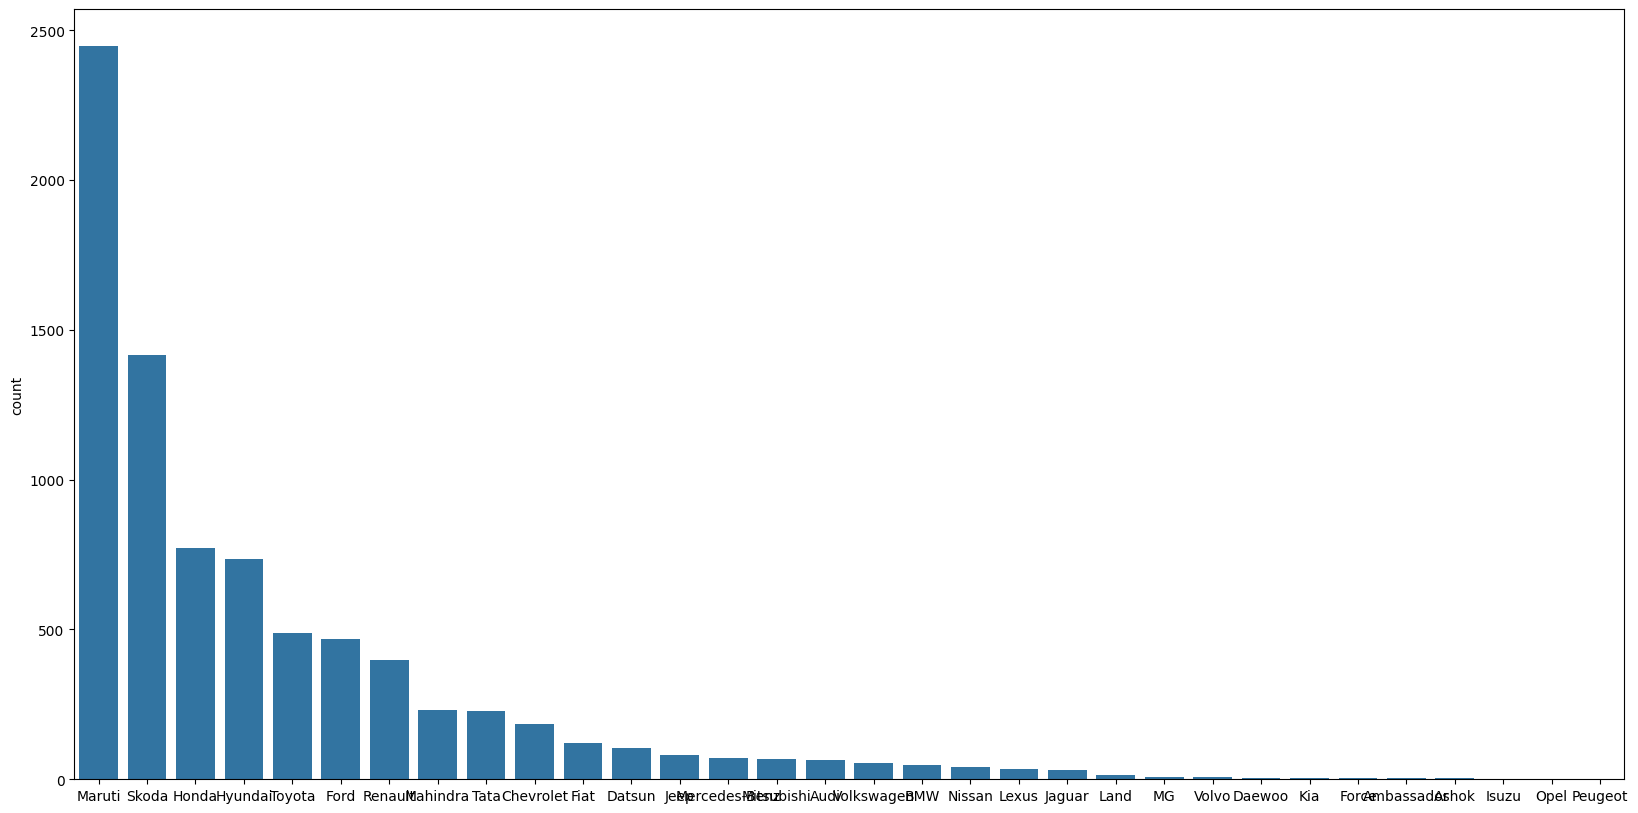

In [217]:
#plot here
plt.figure(figsize=(20, 10))
sns.barplot(x=df['brand'].unique(), y=df['brand'].value_counts())

#### Perform a simiar process as Engine column for the Mileage column, extract the mileage number convert it to float and round it to the nearest 1's place

In [218]:
# code here
# code ends
df['mileage']=df['mileage'].str.split(' ').str[0].astype(float).round(-1)

<Axes: xlabel='mileage', ylabel='count'>

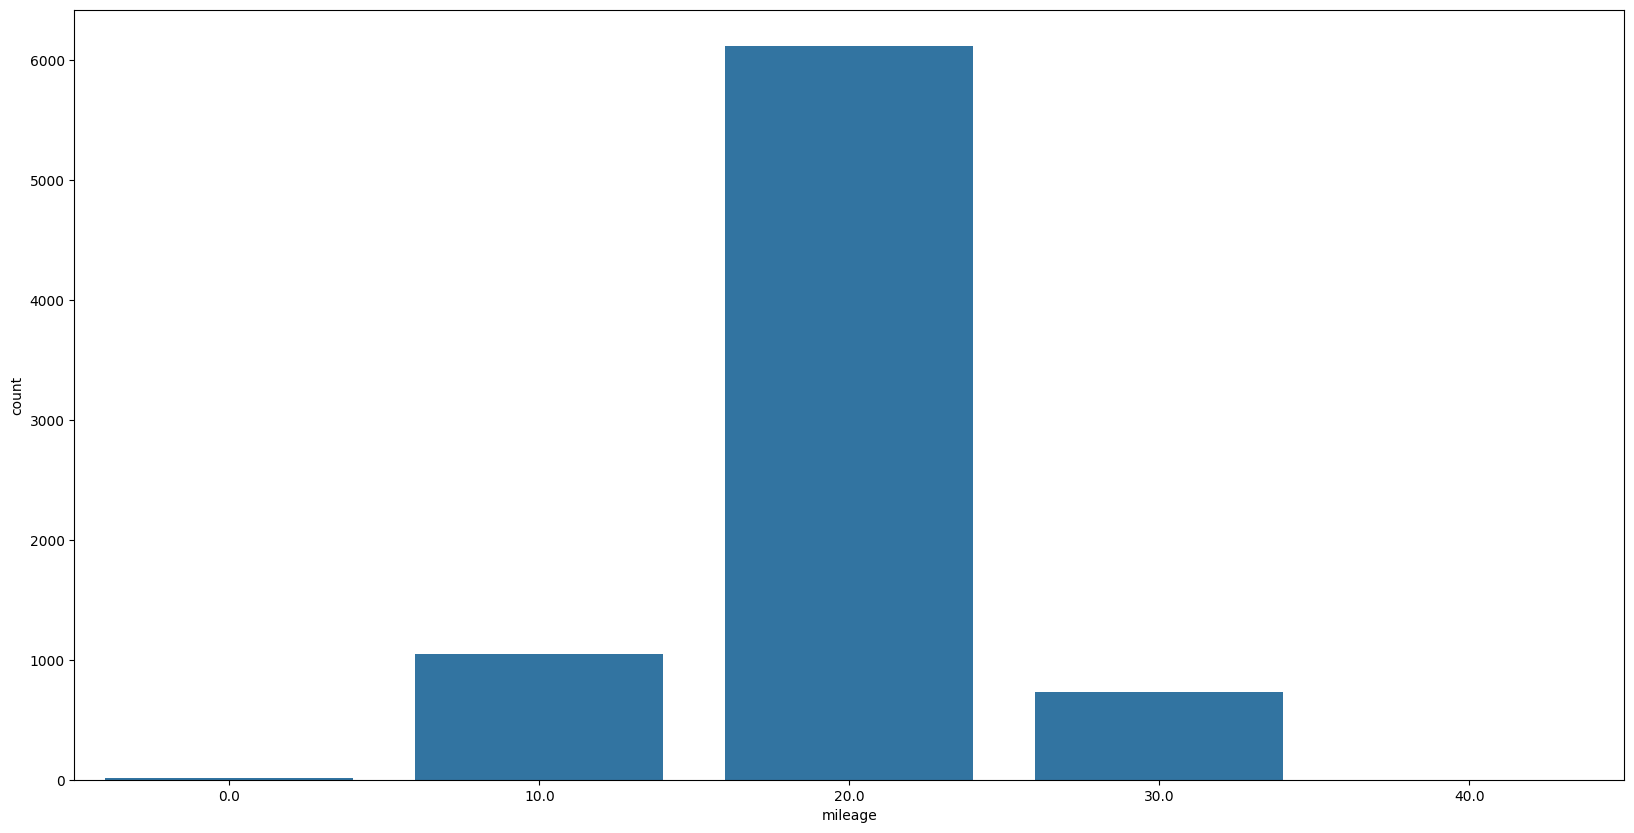

In [219]:
#plot the count of each mileage value
# code here
plt.figure(figsize=(20, 10))
sns.countplot(df, x="mileage", gap=2)

#### If you want to do more analysis and make some graphs you are more than welcome :)

## What do you infer from the above analysis


### Answer Here

*   over 6000 cars had the mileage of around 20kmpl
*   nearly 2500 cars of maruti were sold
*   65.1% of the cars sold were to first owners
*   over 7000 cars sold had manual transmission
*   over 4000 cars had diesel engine in them


### Now let's prep our data to perform Regression to predict the Selling Price

##### As you can see the column max_power is of type object, we need to extract the max_power similar to Engine and Mileage columns

Be careful of NaN values in this part of the code, perform df.info() to look how many Nan value are present, you might face diffculties when you are trying to convert object to float in Nan values are present

In [220]:
# code here
df=df.dropna()

In [221]:
# code ends
df['max_power'] = df['max_power'].str.split(' ').str[0]
print(df['max_power'])

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 7906, dtype: object


<ipython-input-221-9fb009e2b59d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_power'] = df['max_power'].str.split(' ').str[0]


##### The year column contains the year the car was manufactured, but this data won't be directly useful to us
##### Use the current year to calculate the age of the car

In [222]:
# code here
df['age']= 2024-df['year']
df.drop('year', axis=1, inplace=True)
df.drop('name', axis=1, inplace= True)

print(df.head())
# drop the columns year and name

   selling_price  km_driven    fuel seller_type transmission         owner  \
0         450000     145500  Diesel  Individual       Manual   First Owner   
1         370000     120000  Diesel  Individual       Manual  Second Owner   
2         158000     140000  Petrol  Individual       Manual   Third Owner   
3         225000     127000  Diesel  Individual       Manual   First Owner   
4         130000     120000  Petrol  Individual       Manual   First Owner   

   mileage  engine max_power                    torque  seats    brand  age  
0     20.0  1250.0        74            190Nm@ 2000rpm    5.0   Maruti   10  
1     20.0  1500.0    103.52       250Nm@ 1500-2500rpm    5.0    Skoda   10  
2     20.0  1500.0        78     12.7@ 2,700(kgm@ rpm)    5.0    Honda   18  
3     20.0  1400.0        90  22.4 kgm at 1750-2750rpm    5.0  Hyundai   14  
4     20.0  1300.0      88.2     11.5@ 4,500(kgm@ rpm)    5.0   Maruti   17  


<ipython-input-222-5557aa55e23d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']= 2024-df['year']
<ipython-input-222-5557aa55e23d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('year', axis=1, inplace=True)
<ipython-input-222-5557aa55e23d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('name', axis=1, inplace= True)


##### A few of the columns are still of dtype object, now we will be using Laber Encoder to encode these columns

##### Import LaberEncoder from sklearn

In [223]:
#from google.colab import drive
#drive.mount('/content/drive')

In [224]:
# import here
from sklearn.preprocessing import LabelEncoder
# now label encode the colums = ['fuel', 'seller_type', 'transmission', 'owner', 'brand']
le= LabelEncoder()
le.fit(df['fuel'])
df['fuel']=le.transform(df['fuel'])

le.fit(df['seller_type'])
df['seller_type']=le.transform(df['seller_type'])

le.fit(df['transmission'])
df['transmission']=le.transform(df['transmission'])

le.fit(df['owner'])
df['owner']=le.transform(df['owner'])

le.fit(df['brand'])
df['brand']=le.transform(df['brand'])

df.drop('torque', axis=1, inplace=True)
# code here
# code ends

<ipython-input-224-6670845efc4a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel']=le.transform(df['fuel'])
<ipython-input-224-6670845efc4a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seller_type']=le.transform(df['seller_type'])
<ipython-input-224-6670845efc4a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

Do df.head() to see how your dataframe looks like after LabelEncoding

In [225]:
print(df.head())

   selling_price  km_driven  fuel  seller_type  transmission  owner  mileage  \
0         450000     145500     1            1             1      0     20.0   
1         370000     120000     1            1             1      2     20.0   
2         158000     140000     3            1             1      4     20.0   
3         225000     127000     1            1             1      0     20.0   
4         130000     120000     3            1             1      0     20.0   

   engine max_power  seats  brand  age  
0  1250.0        74    5.0     20   10  
1  1500.0    103.52    5.0     26   10  
2  1500.0        78    5.0     10   18  
3  1400.0        90    5.0     11   14  
4  1300.0      88.2    5.0     20   17  


##### The reason behind standardization and normalization will be explained in the later part of the task

##### For now we need to Normalize somem specific coloums
##### Import MinMaxScaler from sklearn and normalize the coloums - ['km_driven', 'mileage', 'engine', 'max_power', 'seats', 'age', 'selling_price']

In [226]:
# import here
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

columns_to_normalize = ['km_driven', 'mileage', 'engine', 'max_power', 'seats', 'age', 'selling_price']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


# code here
#code ends

In [227]:
print(df.head())

   selling_price  km_driven  fuel  seller_type  transmission  owner  mileage  \
0       0.042126   0.061640     1            1             1      0      0.5   
1       0.034102   0.050837     1            1             1      2      0.5   
2       0.012839   0.059310     3            1             1      4      0.5   
3       0.019559   0.053803     1            1             1      0      0.5   
4       0.010030   0.050837     3            1             1      0      0.5   

     engine  max_power  seats  brand       age  
0  0.211409   0.112200   0.25     20  0.230769  
1  0.295302   0.192593   0.25     26  0.230769  
2  0.295302   0.123094   0.25     10  0.538462  
3  0.261745   0.155773   0.25     11  0.384615  
4  0.228188   0.150871   0.25     20  0.500000  


In [228]:
# Fill NaN values in the dataset
df=df.fillna(0)

As mentioned above, the 'selling_price' column is what we're gonna be predicting. So essentially we need to create two additional dataframes, one which contains all the training features (All columns except 'selling_price') and one which only contains the column 'selling_price'. Name them X and y respectively.

In [229]:
# Seperate the Dataframe into X and y
X = df.drop('selling_price', axis=1)
y = df['selling_price']

print(X)
print(y)

      km_driven  fuel  seller_type  transmission  owner  mileage    engine  \
0      0.061640     1            1             1      0      0.5  0.211409   
1      0.050837     1            1             1      2      0.5  0.295302   
2      0.059310     3            1             1      4      0.5  0.295302   
3      0.053803     1            1             1      0      0.5  0.261745   
4      0.050837     3            1             1      0      0.5  0.228188   
...         ...   ...          ...           ...    ...      ...       ...   
8123   0.046601     3            1             1      0      0.5  0.194631   
8124   0.050414     1            1             1      1      0.5  0.291946   
8125   0.050837     1            1             1      0      0.5  0.211409   
8126   0.010591     1            1             1      0      0.5  0.261745   
8127   0.010591     1            1             1      0      0.5  0.261745   

      max_power  seats  brand       age  
0      0.112200   0.2

### Train-Test Split

Implementation - https://www.youtube.com/watch?v=BUkqYGPnLZ8&ab_channel=ManifoldAILearning

Now, while we need data to train our regression model, it is equally important to keep some data aside for testing the effectiveness of the aforementioned model. Thus the dataset as a whole is generally further divided into the training dataset and the testing dataset.

In order to implement this, import train_test_split function from scikit-learn.

In [230]:
# import here
from sklearn.model_selection import train_test_split

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above, i.e in ratio of 0.3)

In [231]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5534, 11)
X_test shape: (2372, 11)
y_train shape: (5534,)
y_test shape: (2372,)


Can you see that the data has been divided into 2 datasets of size 70% and 30% of the original dataset each? Use your calculator to confirm this :)

### We have preprocessed our DataFrame now we'll perform Regression on this Data

### First lets understand Linear Regression, watch this video carefully it will be helpfull later on :)

https://www.youtube.com/watch?v=7ArmBVF2dCs

### A quick article
https://www.analyticsvidhya.com/blog/2021/08/understanding-linear-regression-with-mathematical-insights/

In [232]:
#from google.colab import drive
#drive.mount('/content/drive')

In [233]:
# perfrom linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# perform linear regression

model= LinearRegression()

# create an instance of LinearRegression

In [234]:
# fit the model on the training data, hint: use the fit method
model.fit(X_train, y_train)

LinearRegression()

#### The X_train and y_train dataframes have been used to train the model. Now we will use X_test and y_test to evaluate the efficiency of the model we have trained.

#### Use regressor.predict() on X_test and store it in a variable called "y_pred". Print type and size of the y_pred.

#### Size should be (22009,) if everything is correct. Yeh line confirm karna hai

In [235]:
# make predictions on the test data
y_pred = model.predict(X_test)
print(y_pred.shape)

(2372,)


In [236]:
# calculate the mean squared error
mse= mean_squared_error(y_test, y_pred)
print(mse)

0.002099227638621846


### Visualize the predictions, plot a scatter plot of y_test vs y_pred and also plot the best fit line

Text(0.5, 1.0, 'Actual vs. Predicted Values')

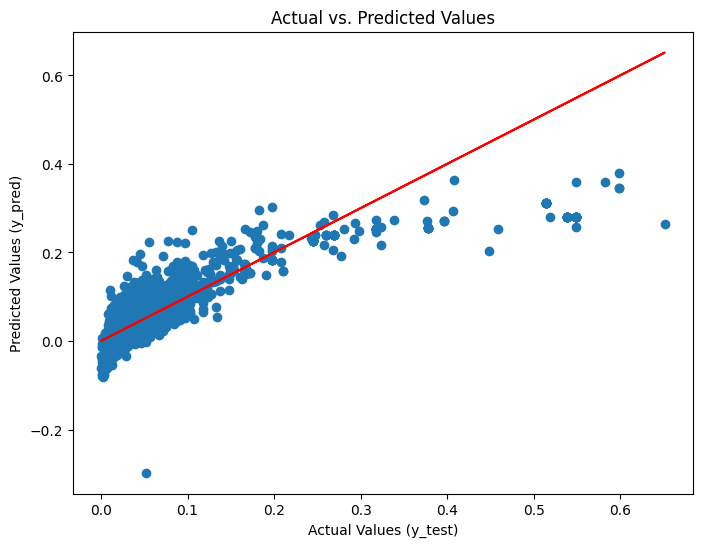

In [237]:
#plot here
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot(y_test,y_test, color='red')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")


# Now let's start the fun part :)

### Have you ever wondered what happens when you call **'regressor.fit(X_train, y_train)'** ?

### To understand what's hapenning in .fit method we will be implementing Linear Regression from scratch.

In [238]:
class LinearRegression() :
    def __init__( self, learning_rate, iterations ) :
        # initialize the learning rate and iterations provides by the user
         self.learning_rate = learning_rate
         self.iterations = iterations

    # Function for model training
    def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape

        # what does self.m and self.n represent and why are they calculated?

        # weight initialization
        self.W = np.zeros(self.n)

        self.b = 0 # set this equal to 0

        self.X =  X # set this equal to X

        self.Y = Y # set this equal to Y


        # gradient descent learning
        for i in range(self.iterations) : # complete the range function
            self.update_weights()

        return self

    # Helper function to update weights in gradient descent
    def update_weights(self) :
        Y_pred =  self.predict(self.X)            # complete this line

        # calculate gradients
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m

        # write the code to update the weights
        self.W = self.W - self.learning_rate * dW

        self.b = self.b - self.learning_rate * db

        return self


    def predict(self,X) :

        return np.dot(X, self.W) + self.b


In [239]:
model = LinearRegression( iterations = 10000, learning_rate = 0.0001 )

model.fit(X_train, y_train) # Explain in your own words what the fit function does

#### Answer Here

In [240]:
y_pred = model.predict(X_test) # code here
print(y_pred.shape)

(2372,)


In [241]:
# Calculate the mean squared error
mse=mean_squared_error(y_test, y_pred)
print(mse)

0.006370994648502766


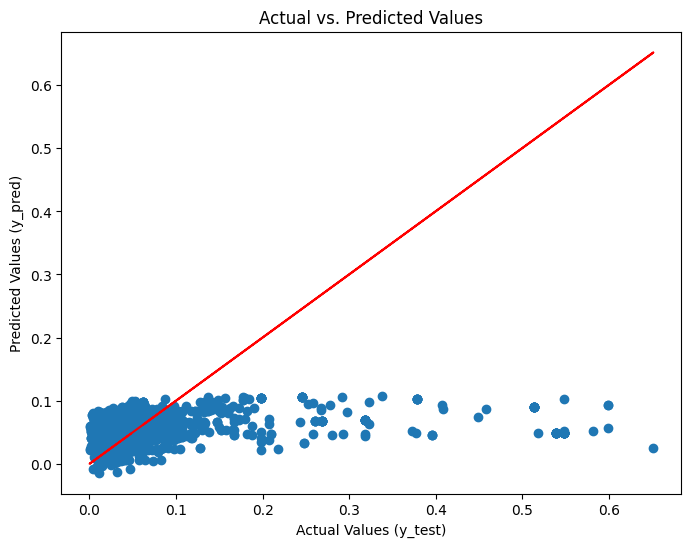

In [242]:
# plot a similar scatter plot as above
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot(y_test,y_test, color='red')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.show()

## Classification

#### In the below cells, we are going to implement K Nearest Neighbour Classification.

Link to the dataset is here - https://drive.google.com/file/d/1bVOfBJYUr0JtZ7pp1lcyNamnHHXn_fDm/view?usp=sharing <br>

Import the 'classified_data.txt' dataset using pandas and print the first five columns.

Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created. Call this new dataframe 'df'.

In [243]:
df = pd.read_csv('/content/classified_data.txt',index_col=0)
print(df.head())

        WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1  


If you're wondering what these column names signify, well they are classified as the dataset name suggests. Our job here is to simply take the data at face value and build a model for classifying the target classes.

#### Basic EDA

##### In the following two cells, use info() and describe() to get the data type and statistical summary of the dataset

In [244]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB
None


In [245]:
print(df.describe())

               WTT          PTI          EQW          SBI          LQE  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.949682     1.114303     0.834127     0.682099     1.032336   
std       0.289635     0.257085     0.291554     0.229645     0.243413   
min       0.174412     0.441398     0.170924     0.045027     0.315307   
25%       0.742358     0.942071     0.615451     0.515010     0.870855   
50%       0.940475     1.118486     0.813264     0.676835     1.035824   
75%       1.163295     1.307904     1.028340     0.834317     1.198270   
max       1.721779     1.833757     1.722725     1.634884     1.650050   

               QWG          FDJ          PJF          HQE          NXJ  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.943534     0.963422     1.071960     1.158251     1.362725   
std       0.256121     0.255118     0.288982     0.293738     0.204225   
min       0.262389     0.295228     0

**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
##### Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
##### Refer seaborn boxplot() documentation

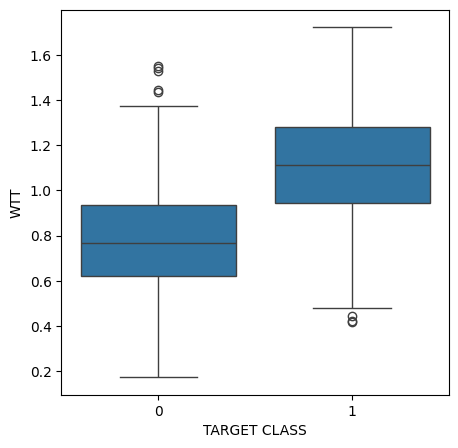

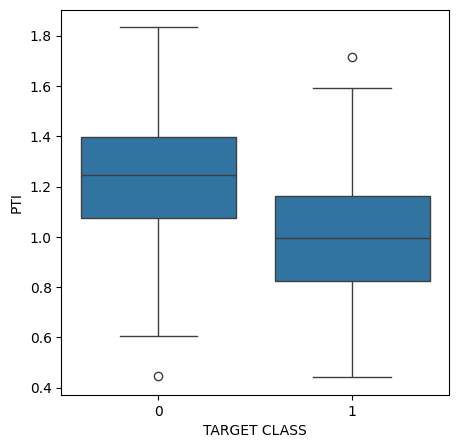

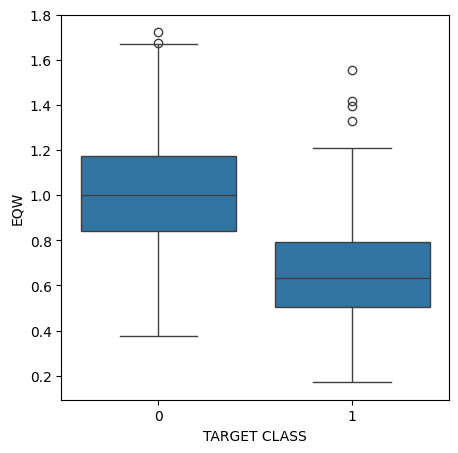

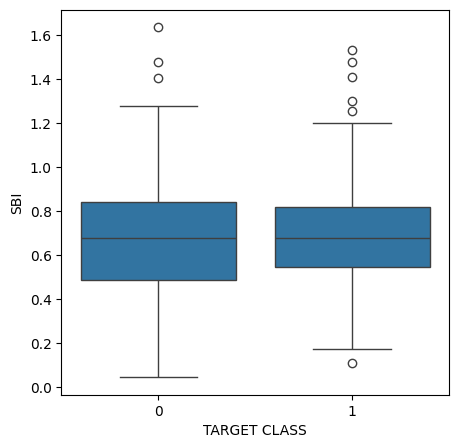

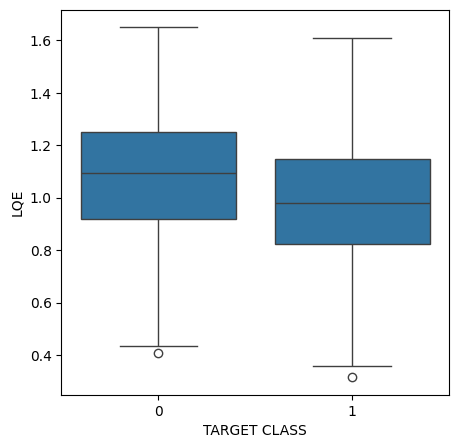

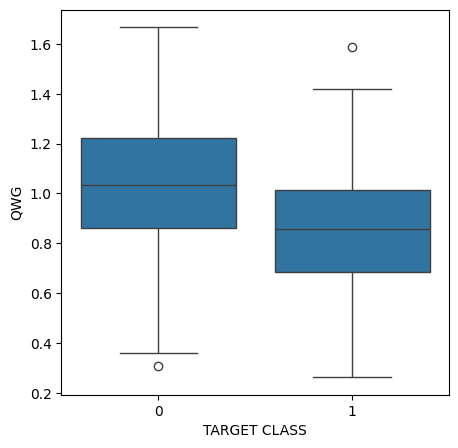

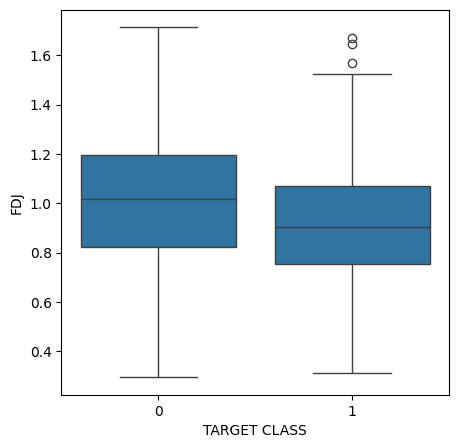

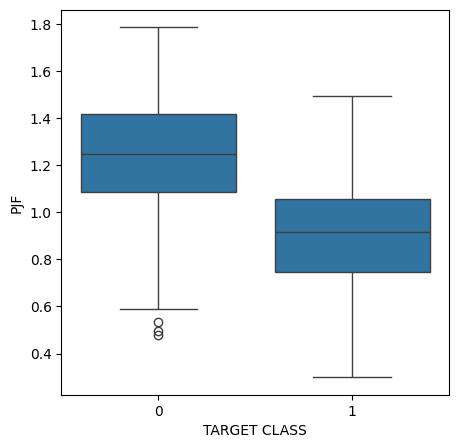

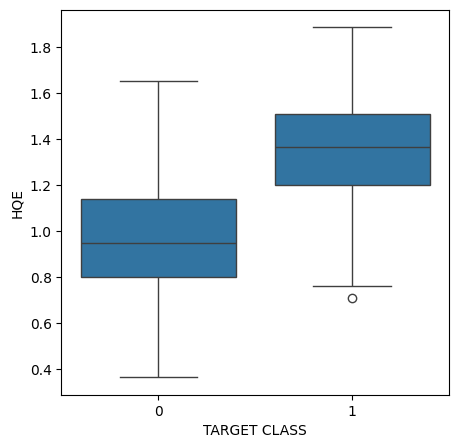

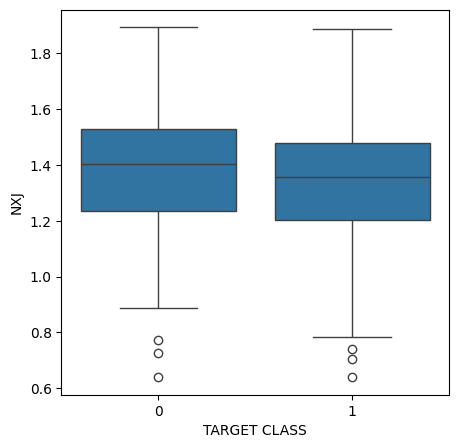

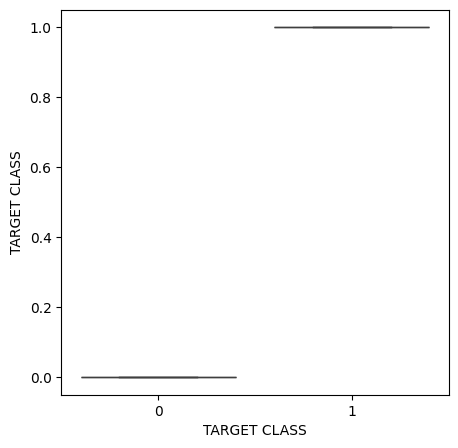

In [246]:
#plot
for col in df.columns:
  plt.figure(figsize=(5, 5))
  sns.boxplot(x=df['TARGET CLASS'], y=df[col])

##### What conclusion, if any can you draw from these boxplots?
List them down below.

### Standardize the features using sklearn.preprocessing
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardization is usually used prior to model fitting.<br><br>

To give you an example, values pertaining to Age usually lie within the range of 1-100, however values pertaining to Salary lie in a much wider range of say 10000-1000000. You can see how having both columns be a part of a classification model as is would lead to an imbalance in importance assigned to columns.
<br><br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

##### **import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [247]:
# your code starts here
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
# your code ends here

##### **Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
##### Hint: scaler.fit() and scaler.transform()

In [248]:
# your code starts herev
# your code ends here
newData= df.drop('TARGET CLASS', axis=1)
scaler.fit(newData)
newData= scaler.transform(newData)
print(newData)

[[-0.12354188  0.18590747 -0.91343069 ... -1.48236813 -0.9497194
  -0.64331425]
 [-1.08483602 -0.43034845 -1.02531333 ... -0.20224031 -1.82805088
   0.63675862]
 [-0.78870217  0.33931821  0.30151137 ...  0.28570652 -0.68249379
  -0.37784986]
 ...
 [ 0.64177714 -0.51308341 -0.17920486 ... -2.36249443 -0.81426092
   0.11159651]
 [ 0.46707241 -0.98278576 -1.46519359 ... -0.03677699  0.40602453
  -0.85567   ]
 [-0.38765353 -0.59589427 -1.4313981  ... -0.56778932  0.3369971
   0.01034996]]


**scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [249]:
# your code starts here
df_feat= pd.DataFrame(newData, columns=df.columns[:-1])
print(df_feat.head())
# your code ends here

        WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510  


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initial dataframe "df"

In [250]:
X,y = df_feat,  df['TARGET CLASS']
print(X)
print(y)

          WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0   -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1   -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2   -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3    0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4    1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.211653 -0.312490  0.065163 -0.259834  0.017567 -1.395721 -0.849486   
996 -1.292453 -0.616901  0.369613  0.482648  1.569891  1.273495  0.362784   
997  0.641777 -0.513083 -0.179205  1.022255 -0.539703 -0.229680 -2.261339   
998  0.467072 -0.982786 -1.465194 -0.071465  2.368666  0.001269 -0.422041   
999 -0.387654 -0.595894 -1.431398  0.512722 -0.402552 -2.026512 -0.726253   

          PJF       HQE       NXJ  
0   -1.482368 -0.949719 -0.643314  
1  

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [251]:
# Your code starts here.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
# Your code ends here

### Model fit and training

Before moving ahead with the cells below, learn how the K Nearest Neighbour Algorithm actually works.

Theory and implementation : https://youtu.be/wTF6vzS9fy4 <br>
Theory: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1 (more on this later) . Fit this on X_train and y_train**

In [252]:
# Your code starts here.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)  # You can change the number of neighbors (k)
knn.fit(X_train, y_train)
# Your code ends here

KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [253]:
# Your code starts here.
pred = knn.predict(X_test)
# Your code ends here

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [254]:
# Your code starts here.
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))
# Your code ends here

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



#### Learn all about classification metrics - https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69

**Print the accuracy using numpy and round it to 3 decimal places.**

In [255]:
# Your code starts here.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)
print(round(accuracy, 3))
# Your code ends here

0.937


##### Hey, not bad! But can we further improve this? Remember our arbitrary choice for n_neighbours? Can we improve that?

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [257]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list

# Your code starts here.
accuracy_lst = {}
for i in range(1,60):
  knn =  KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i =  knn.predict(X_test)
  accuracy_lst[i]= accuracy_score(y_test,pred_i)

# Your code ends here
accuracy_keys=list(accuracy_lst.keys())
accuracy_val= list(accuracy_lst.values())

maxval= accuracy_val[0]
maxind=0
for i in range(1,len(accuracy_val)):
  if accuracy_val[i]>maxval:
    maxval= accuracy_val[i]
    maxind=i
print("Best value of n_neighbours:",accuracy_keys[maxind])
print("Corresponding highest accuracy:",maxval)

Best value of n_neighbours: 12
Corresponding highest accuracy: 0.9533333333333334


##### **Plot a graph of K value vs Accuracy**

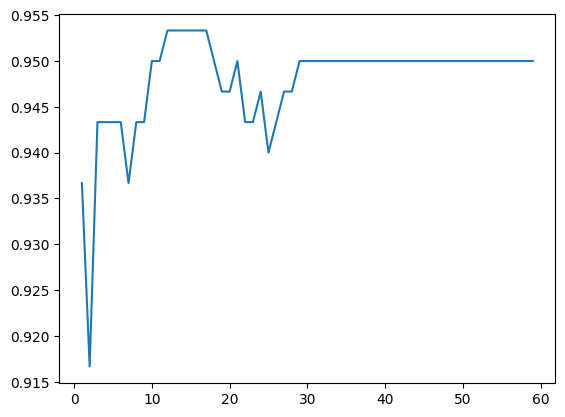

In [258]:
# Your code starts here.
plt.plot(list(accuracy_lst.keys()), list(accuracy_lst.values()))
plt.show()
# Your code ends here

##### **Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [259]:
# Your code starts here.
n_acc_best =0.953
n_neigh_best = 15
print("Best value of n_neighbours:",n_neigh_best)
print("Corresponding highest accuracy:",n_acc_best)
# Your code ends here

Best value of n_neighbours: 15
Corresponding highest accuracy: 0.953


### OPTIONAL: Explainability

So you passed some data into a model, and trained it using that data. You then used some other data to test the accuracy of that model, and it now predicts values when you pass in some data. Ok. But how does it REALLY predict that value? How much is it relying on each individual feature column of data that you passed to the model? This is where the concept of explainability comes into picture, where you can understand for each data point, exactly what parameters led the model to predict the value that it has.

Info about explainable AI <br>
https://www.ibm.com/topics/explainable-ai <br>
About shap <br>
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [260]:
#Run this code as it is
from shap import KernelExplainer, force_plot, sample

ModuleNotFoundError: No module named 'shap'

In [262]:
import shap

ModuleNotFoundError: No module named 'shap'

In [ ]:
X_test = pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

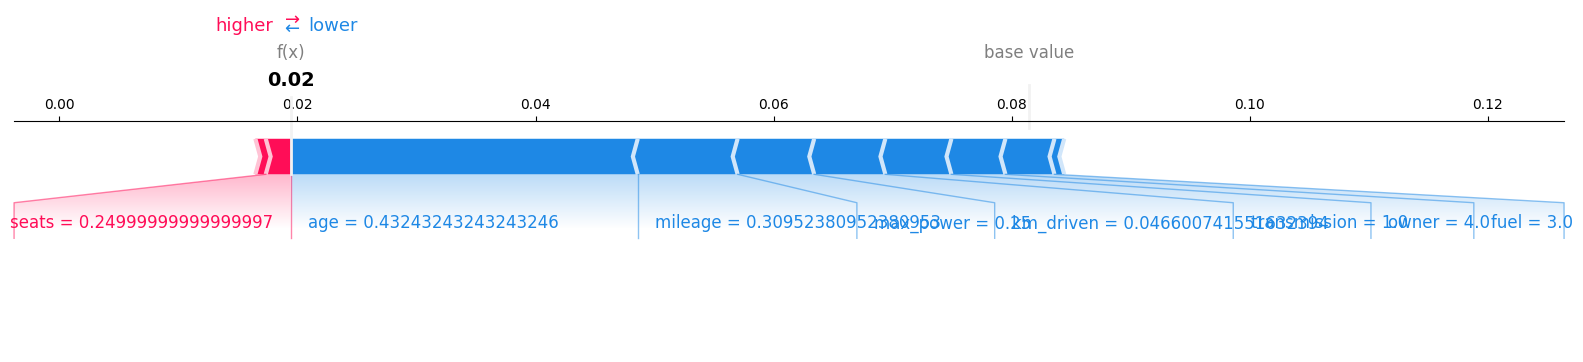

In [ ]:
#Run this code as it is
ex = KernelExplainer(regressor.predict, sample(X_train, 10))  #only taking sample of 10 values for now
shap_values = ex.shap_values(X_test.iloc[0,:]) #explaining 1st tuple of the X_test dataframe
force_plot(ex.expected_value, shap_values, X_test.iloc[0,:], matplotlib=True)

##### Plotting the same information in a different way

In [ ]:
explainer_ebm = shap.Explainer(regressor.predict,sample(X_train, 10))
shap_values_ebm = explainer_ebm(X_train)

PermutationExplainer explainer: 6503it [00:49, 106.40it/s]                          


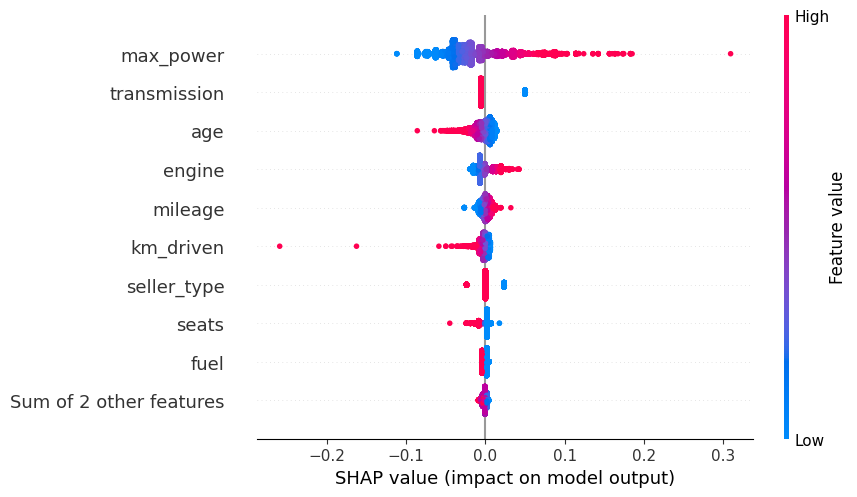

In [ ]:
shap.plots.beeswarm(shap_values_ebm)

#### Can you see how the above plot visualizes which parameters contributed significantly to the prediction, and what were the actual values which led to the prediction?

RESEARCH TASK:


A)Logistic Regression

https://ryxcommar.com/2020/06/27/why-do-so-many-practicing-data-scientists-not-understand-logistic-regression/

B) Read the above article and write you understand


What is a logit, probit?

C) Difference between logistic regression and classification

End of Task

©DJS Synapse 2024 - 2025